In [ ]:
#1. load saved CSV you want to look at
#2. Add actual prices for the date the csv tried to predict
#3. Save csv again with actual prices
#4. Load in csv with AP
#5. Append current csv to historic CSV file tracking accuracy & prediction
#6. From there index the information how is needed
#   6.1 Track accuracy & Std over several days + plot
#7. Run test of accuracy for Exp. Dates that are further in the future
#8. set up DF for TF with MACD and other financial Data

In [234]:
#THINGS TO DO

# add new csv to existing DF
# What factors/inputs determine/affect the accuracy & standard deviation?? - inclusion of other Signals?
# --> need to move prediction prices as close together as possible to increase Acc & decrease Std
# plot mean/std over range of Days
# run tensorflow to determine correlation of inputs on output (with other signals) - maybe skip for test run
# write function to do this automatically

# Then first test run

#Analysis Functions needed for:
# 1. New CSVs loaded in to analyze to categorize (by Days_to_Exp) to DF/CSVs with same Days_to_Exp
# 2. Calculating Std and Intervals of CSPS of PP to AP and plot it
# 3. Add Fundamentals of Tickers in separate DF
# 4. Throw All DFs together for first step of X-train/test data --> then add MACD signal and Fundamentals

In [1]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display
from option_prediction import OUTPUT_FOLDER

/Users/xpatricklorenzx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Company_Names = ["AMZN", "MSFT","AAPL", "TSLA","NFLX","FB","V","NVDA","GOOG","ZM","BA","INTC",'AMD',"F","GE","AAL",\
                 "DIS", "DAL", "CCL", "SNAP","UAL","BABA","UBER","TWTR","SBUX","SPY","QQQ","BYND","SQ","PENN",\
                 "XOM", "SHOP","ATVI","WMT","MRNA","JPM","GS","C","SNE","MGM"]


In [3]:
#set expiry date:
date_of_interest = '2020-09-11'

#specify days to go back, i.e. folders:
days_to_go_back = 3

In [19]:
full_prediction_df = pd.DataFrame({})

dates = pd.date_range(end=datetime.date.today(), periods=days_to_go_back, freq='d').strftime('%Y_%m_%d').to_list()
#get valid dataframes:
for date in dates:
    if os.path.isfile('{0}/{1}/Option_Weekly_{1}.csv'.format(OUTPUT_FOLDER, date)) and \
    os.path.isfile('{0}/{1}/Company_Fundamentals_{1}.csv'.format(OUTPUT_FOLDER, date)):
        valid_op_dataFrames = pd.read_csv('{0}/{1}/Option_Weekly_{1}.csv'.format(OUTPUT_FOLDER, date), index_col=0)
        
        valid_fdmtls_dataFrames = pd.read_csv('{0}/{1}/Company_Fundamentals_{1}.csv'.format(OUTPUT_FOLDER, date),\
                                              index_col=0)
        df_outer = [pd.merge(valid_op_dataFrames, valid_fdmtls_dataFrames, on='Tickers', how='outer')]
        for x in df_outer:
        
            full_prediction_df = full_prediction_df.append(x, ignore_index=True)
        
    else:
        print("0")
    
    #df_outer = pd.merge(valid_op_dataFrames, valid_fdmtls_dataFrames, on='Tickers', how='outer')
    #df_outer_adj = df_outer.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)
pd.set_option("display.max_rows", None, "display.max_columns", None)
full_prediction_df

0


,Tickers,Todays Price,Option Exp Date,Days_to_Exp,Calls_WOI,Puts_WOI,CPSP,implied Change to prior week,implied %Change to prior week,MarketCap,Beta,50 Day MA,MA to TP %,1W %Change,30day Vol,Avg Daily %Return,95% VaR,Sharpe Ratio,1W Ticker vs Bm %Change
0,AMZN,3149.840088,2020-09-11,3,3597.095583,3178.205103,3429.539391,279.699303,8.879794,1577.723363,1.323857,3154.027002,0.132925,-7.406666,2.375745,0.3054,-4.40,32.746843,-2.797578
1,AMZN,3149.840088,2020-09-18,10,3329.160263,2604.849658,3039.436021,-390.103370,-11.374804,1577.723363,1.323857,3154.027002,0.132925,-7.406666,2.375745,0.3054,-4.40,32.746843,-2.797578
2,AMZN,3149.840088,2020-09-25,17,3765.919801,3134.482643,3513.344938,473.908917,15.592002,1577.723363,1.323857,3154.027002,0.132925,-7.406666,2.375745,0.3054,-4.40,32.746843,-2.797578
3,AMZN,3149.840088,2020-10-02,24,3429.468008,3109.953110,3301.662048,-211.682889,-6.025110,1577.723363,1.323857,3154.027002,0.132925,-7.406666,2.375745,0.3054,-4.40,32.746843,-2.797578
4,MSFT,202.660004,2020-09-11,3,235.550762,204.271517,223.039064,20.379060,10.055788,1533.659972,0.893534,211.045400,4.137667,-11.467389,2.068670,0.1972,-5.56,13.054834,-6.858300
5,MSFT,202.660004,2020-09-18,10,227.006216,174.733445,206.097107,-16.941956,-7.595959,1533.659972,0.893534,211.045400,4.137667,-11.467389,2.068670,0.1972,-5.56,13.054834,-6.858300
6,MSFT,202.660004,2020-09-25,17,229.209158,206.367282,220.072408,13.975300,6.780930,1533.659972,0.893534,211.045400,4.137667,-11.467389,2.068670,0.1972,-5.56,13.054834,-6.858300
7,MSFT,202.660004,2020-10-02,24,228.683367,203.801896,218.730779,-1.341629,-0.609631,1533.659972,0.893534,211.045400,4.137667,-11.467389,2.068670,0.1972,-5.56,13.054834,-6.858300
8,AAPL,112.820000,2020-09-11,3,167.872738,121.892215,149.480529,36.660529,32.494708,1929.503965,1.284838,107.352749,-4.845994,-9.604794,2.636939,0.3082,-5.62,24.309789,-4.995705
9,AAPL,112.820000,2020-09-18,10,162.370049,105.814715,139.747915,-9.732614,-6.510958,1929.503965,1.284838,107.352749,-4.845994,-9.604794,2.636939,0.3082,-5.62,24.309789,-4.995705


In [4]:
OUTPUT_FOLDER_CPSP = "Option_Analysis_CPSP_csv"
try:
    os.mkdir(OUTPUT_FOLDER_CPSP)
except FileExistsError:
    pass

def actual_prices(date_of_interest, days_to_go_back, Company_Names, OUTPUT_FOLDER,\
                  output_folder_cpsp=OUTPUT_FOLDER_CPSP, export_table=True):


    #1.create dates as list with the same format as folder names:
    dates = pd.date_range(end=datetime.date.today(), periods=days_to_go_back, freq='d').strftime('%Y_%m_%d').to_list()
    full_prediction_df = pd.DataFrame({})
    #2. get valid dataframes:
    
    for date in dates:
        if os.path.isfile('{0}/{1}/Option_Weekly_{1}.csv'.format(OUTPUT_FOLDER, date)) and \
        os.path.isfile('{0}/{1}/Company_Fundamentals_{1}.csv'.format(OUTPUT_FOLDER, date)):
            valid_op_dataFrames = pd.read_csv('{0}/{1}/Option_Weekly_{1}.csv'.format(OUTPUT_FOLDER, date), index_col=0)

            valid_fdmtls_dataFrames = pd.read_csv('{0}/{1}/Company_Fundamentals_{1}.csv'.format(OUTPUT_FOLDER, date),\
                                                  index_col=0)
            df_outer = pd.merge(valid_op_dataFrames, valid_fdmtls_dataFrames, on='Tickers', how='outer')
            
            for x in df_outer:
                full_prediction_df = full_prediction_df.append(x, ignore_index=True)
        else:
            print("0")
    #set expiry date:
    #date_of_interest = '2020-09-04'

    dataFrames_to_merge = [df.loc[df['Option Exp Date'] == date_of_interest] for df in full_prediction_df]
    #dataFrames_to_merge = [df.loc[df['Tickers'] != 'AAPL'].loc[df['Tickers'] != 'TSLA'] for df in dataFrames_to_merge]
    Option_Analysis_df = pd.concat(dataFrames_to_merge)
    Option_Analysis_df.sort_values(by=['Tickers', 'Days_to_Exp'], inplace=True)
    #display(Option_Analysis_df)
    
    #3. Add actual prices at Expiry for the date the csv tried to predict
    Option_Analysis_loadin = Option_Analysis_df.loc[lambda Option_Analysis_df: \
                                                    Option_Analysis_df['Option Exp Date']== date_of_interest, :]
    Option_Analysis_loadin_reset = Option_Analysis_loadin.reset_index(drop=True)
    Option_Analysis_loadin_tickers = list(Option_Analysis_loadin_reset["Tickers"])

    ticker_t_p_list = []

    for x in Option_Analysis_loadin_tickers:
        #To get Actual Price Data of Ticker list
        tickerp = yf.download(x, start= date_of_interest)
        ticker_p = tickerp['Close']
        ticker_t_p = ticker_p[1]
        ticker_t_p_list.append(ticker_t_p)

    #Add Prices at Exp to DF
    Option_Analysis_loadin_reset["Actual Price @ Expiry"] = ticker_t_p_list
    Option_Analysis_Final = Option_Analysis_loadin_reset
    
    #4. Clarify Cols and calculate Expected - Actual change
    Option_Analysis_Final["Price @ DtE"] = Option_Analysis_Final["Todays Price"]
    Option_Analysis_Final["Expected %Change"] = (Option_Analysis_Final["CPSP"]-Option_Analysis_Final["Price @ DtE"])/\
    Option_Analysis_Final["Price @ DtE"]*100
    
    Option_Analysis_Final["Abs_AP_to_CPSP_Diff"] = Option_Analysis_Final["CPSP"]- \
    Option_Analysis_Final["Actual Price @ Expiry"]
    Option_Analysis_Final["%_AP_to_CPSP_Diff"] = (Option_Analysis_Final["Abs_AP_to_CPSP_Diff"] / \
                                                      Option_Analysis_Final["Actual Price @ Expiry"])*100
    Option_Analysis_Final["Prediction_Accuracy_%_CPSP"] = 100 + Option_Analysis_Final["%_AP_to_CPSP_Diff"]
    Option_Analysis_Final["Actual %Change"] = (Option_Analysis_Final["Actual Price @ Expiry"] -\
    Option_Analysis_Final["Price @ DtE"])/Option_Analysis_Final["Price @ DtE"]*100

    Option_Analysis_Final["Expected - Actual"] = Option_Analysis_Final["Expected %Change"] - \
    Option_Analysis_Final["Actual %Change"]

    Option_Analysis_CPSP = Option_Analysis_Final[["Tickers","Days_to_Exp","Price @ DtE","CPSP",\
                                                 "Actual Price @ Expiry",\
                                                 "Expected %Change", "Actual %Change","Expected - Actual",\
                                                 "MarketCap","Beta","50 Day MA","MA to TP %","Sharpe Ratio",\
                                                 "30day Vol", "95% VaR"]]
    emin = min(Option_Analysis_CPSP["Expected %Change"])
    amin = min(Option_Analysis_CPSP["Actual %Change"])
    mins = [emin, amin]

    emax = max(Option_Analysis_CPSP["Expected %Change"])
    amax = max(Option_Analysis_CPSP["Actual %Change"])
    maxs = [emax, amax]

    min_axis = min(mins)
    max_axis = max(maxs)

    min_max_axis = [min_axis,max_axis]
    axiss_final = max(np.abs(min_max_axis))
    minaxis = -axiss_final
    maxaxis = axiss_final
    
    #5. Plot accross tickers and DtE
    plt.figure(figsize=(12,12))

    for x in Company_Names:
        Option_Analysis_CPSPticker = Option_Analysis_CPSP.loc[lambda Option_Analysis_CPSP: \
                                                        Option_Analysis_CPSP['Tickers']== x, :]

        Option_Analysis_CPSPticker_reset = Option_Analysis_CPSPticker.reset_index(drop=True)

        #Option_Analysis_CPSPticker_reset["Expected %Change Adj"] = \
        #Option_Analysis_CPSPticker_reset["Expected %Change"] \
        #- DTE0_m

        plt.scatter(Option_Analysis_CPSPticker_reset["Expected %Change"],\
                    Option_Analysis_CPSPticker_reset["Actual %Change"], label = x)

        plt.gca().set_xlim(minaxis-1,\
                           maxaxis+1)
        plt.gca().set_ylim(minaxis-1,\
                           maxaxis+1)
    plt.grid()
    plt.legend()
    #print(DTE0_m)

    plt.figure(figsize=(12,12))

    for x in Option_Analysis_CPSPticker_reset["Days_to_Exp"]:
        Option_Analysis_CPSP_days = Option_Analysis_CPSP.loc[lambda Option_Analysis_CPSP: \
                                                    Option_Analysis_CPSP['Days_to_Exp']== x, :]
        Option_Analysis_CPSP_days_reset = Option_Analysis_CPSP_days.reset_index(drop=True)

        DTE0_m = Option_Analysis_CPSP["Expected - Actual"].mean()

        #Option_Analysis_CPSP_days_reset["Expected %Change Adj"] = \
        #Option_Analysis_CPSP_days_reset["Expected %Change"] - \
        #DTE0_m

        plt.scatter(Option_Analysis_CPSP_days_reset["Expected %Change"],\
                    Option_Analysis_CPSP_days_reset["Actual %Change"], label = x)

        plt.gca().set_xlim(minaxis-1,\
                           maxaxis+1)
        plt.gca().set_ylim(minaxis-1,\
                           maxaxis+1)
    plt.grid()
    plt.legend()
    
    #6. Analyse how many predictions were made in the correct direction
    ePredictions = []
    aPredictions = []

    for x in Option_Analysis_CPSP["Expected %Change"]:
        if x > 0:
            ePredictions.append("positive")
        else: 
            ePredictions.append("negative")

    for x in Option_Analysis_CPSP["Actual %Change"]:
        if x > 0:
            aPredictions.append("positive")
        else: 
            aPredictions.append("negative")

    Prediction = []        
    for x,y in zip(ePredictions, aPredictions):
        if x == y:
            Prediction.append("Correct")
        else: 
            Prediction.append("False")

    da = Prediction.count("Correct")/np.shape(Option_Analysis_CPSP)[0]*100

    shape = np.shape(Option_Analysis_CPSP)[0]

    print(Prediction.count("Correct"), "correctly predicted out of",shape," hence a ",da,"% Accuracy" )
    print(Prediction.count("False"), "incorrectly predicted out of", shape)
    Option_Analysis_CPSP["predicted Direction"] = Prediction

    pd.set_option("display.max_rows", None, "display.max_columns", None) 
    Option_Analysis_CPSP[["Tickers","Days_to_Exp","Price @ DtE","CPSP", "Actual Price @ Expiry",\
                          "Expected %Change","Actual %Change","predicted Direction","Expected - Actual",\
                          "MarketCap","Beta","50 Day MA","MA to TP %","Sharpe Ratio",\
                          "30day Vol", "95% VaR"]]
    folder_suffix = date_of_interest.replace("-", "_")
    try:
        folder = os.path.join(output_folder_cpsp, folder_suffix)
        os.mkdir(folder)
    except FileExistsError:
        pass

    table_name = os.path.join(folder, "Option_Analysis_CPSP_{}.csv".format(folder_suffix))
    if export_table:
        Option_Analysis_CPSP.to_csv(table_name)
        print("Exported: {}".format(table_name))
    
    return Option_Analysis_CPSP

,Tickers,Todays Price,Option Exp Date,Days_to_Exp,Calls_WOI,Puts_WOI,CPSP,implied Change to prior week,implied %Change to prior week
60,AAL,13.608100,2020-09-04,0,15.015564,12.234840,13.903275,0.295175,2.169109
60,AAL,13.230000,2020-09-04,2,14.866343,12.137793,13.774923,0.544923,4.118845
60,AAL,13.100000,2020-09-04,3,14.745937,12.397224,13.806452,0.706451,5.392759
60,AAL,13.050000,2020-09-04,4,14.835218,12.401594,13.861768,0.811768,6.220445
61,AAL,13.590000,2020-09-04,7,15.208803,12.004554,13.927103,0.278933,2.043740
...,...,...,...,...,...,...,...,...,...
37,ZM,299.000000,2020-09-04,7,314.070731,233.166685,281.709112,-4.259970,-1.489661
37,ZM,294.679993,2020-09-04,8,310.502296,242.500641,283.301634,-3.718564,-1.295576
37,ZM,295.269989,2020-09-04,9,307.438952,243.952424,282.044341,-0.725559,-0.256590
37,ZM,290.350006,2020-09-04,10,313.350577,246.014123,286.415996,3.927441,1.390301


In [ ]:
OUTPUT_FOLDER = "Tensorflow_DataFrame_csv"
try:
    os.mkdir(OUTPUT_FOLDER)
except FileExistsError:
    pass

tf_df_setup = pd.DataFrame({})

def tf_setup(output_folder=OUTPUT_FOLDER, export_table=True):
    #Join all Option_Analysis_CPSP CSVs to create one large DF for Tensorflow
    if os.path.isfile('{0}/{1}/Option_Weekly_{1}.csv'.format(OUTPUT_FOLDER, date)):
        valid_oacpsp_dataFrames = pd.read_csv('{0}/{1}/Option_Weekly_{1}.csv'.format(OUTPUT_FOLDER, date), index_col=0)

        for x in valid_oacpsp_dataFrames:
            tf_df_setup = tf_df_setup.append(x, ignore_index=True)
            
    folder_suffix = date_of_interest.replace("-", "_")
    try:
        folder = os.path.join(output_folder, folder_suffix)
        os.mkdir(folder)
    except FileExistsError:
        pass

    table_name = os.path.join(folder, "Tensorflow_DataFrame_csv_{}.csv".format(folder_suffix))
    if export_table:
        tf_df_setup.to_csv(table_name)
        print("Exported: {}".format(table_name))
    

In [46]:
Option_Analysis_CPSP.describe()

,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,6.000000,289.549044,284.759349,281.819216,-0.888959,-0.418510,-0.470449,-0.208917,99.791083
std,3.656834,598.498633,590.827402,577.218466,4.760689,5.873325,6.884261,6.461576,6.461576
min,0.000000,6.190000,5.650538,6.420000,-31.816400,-19.183287,-31.632530,-24.049582,75.950418
25%,3.000000,39.834999,40.088474,39.080002,-3.588615,-3.495737,-3.235159,-3.217436,96.782564
50%,7.000000,95.634998,93.755249,94.894997,-0.866100,-0.746078,0.505374,0.523693,100.523693
75%,9.000000,281.426247,271.891407,281.390015,2.098838,1.504221,3.724749,3.904981,103.904981
max,11.000000,3531.449951,3475.001310,3294.620117,11.755603,31.530479,15.359083,15.933234,115.933234


In [47]:
#Index according to Ticker
ticker = "AMZN"

Option_Analysis_CPSPticker = Option_Analysis_CPSP.loc[lambda Option_Analysis_CPSP: \
                                                Option_Analysis_CPSP['Tickers']== ticker, :]
Option_Analysis_CPSPticker_reset = Option_Analysis_CPSPticker.reset_index(drop=True)
Option_Analysis_CPSPticker_reset

,Tickers,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
0,AMZN,0,3293.439941,3475.001310,3294.620117,5.512819,0.035834,5.476984,5.475022,105.475022
1,AMZN,2,3531.449951,3470.421174,3294.620117,-1.728151,-6.706306,4.978155,5.336004,105.336004
2,AMZN,3,3499.120117,3443.792754,3294.620117,-1.581179,-5.844326,4.263147,4.527764,104.527764
3,AMZN,4,3450.959961,3417.904497,3294.620117,-0.957863,-4.530329,3.572466,3.741991,103.741991
4,AMZN,7,3399.500000,3399.763363,3294.620117,0.007747,-3.085156,3.092903,3.191362,103.191362
5,AMZN,8,3400.000000,3321.715738,3294.620117,-2.302478,-3.099408,0.796930,0.822420,100.822420
6,AMZN,9,3441.850098,3274.629015,3294.620117,-4.858465,-4.277641,-0.580824,-0.606780,99.393220
7,AMZN,10,3348.800049,3275.012942,3294.620117,-2.203389,-1.617891,-0.585499,-0.595127,99.404873
8,AMZN,11,3299.659912,3222.427280,3294.620117,-2.340624,-0.152737,-2.187887,-2.191234,97.808766


In [48]:
Option_Analysis_CPSPticker_reset.describe()

,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,6.000000,3407.197781,3366.740897,3294.620117,-1.161287,-3.253107,2.091820,2.189047,102.189047
std,3.872983,82.938854,94.780934,0.000000,2.826164,2.357837,2.783952,2.876840,2.876840
min,0.000000,3293.439941,3222.427280,3294.620117,-4.858465,-6.706306,-2.187887,-2.191234,97.808766
25%,3.000000,3348.800049,3275.012942,3294.620117,-2.302478,-4.530329,-0.580824,-0.595127,99.404873
50%,7.000000,3400.000000,3399.763363,3294.620117,-1.728151,-3.099408,3.092903,3.191362,103.191362
75%,9.000000,3450.959961,3443.792754,3294.620117,-0.957863,-1.617891,4.263147,4.527764,104.527764
max,11.000000,3531.449951,3475.001310,3294.620117,5.512819,0.035834,5.476984,5.475022,105.475022


In [14]:
#Index according to Days to Expiry
y = 3

Option_Analysis_CPSP_days = Option_Analysis_CPSP.loc[lambda Option_Analysis_CPSP: \
                                                Option_Analysis_CPSP['Days_to_Exp']== y, :]
Option_Analysis_CPSP_days_reset = Option_Analysis_CPSP_days.reset_index(drop=True)
Option_Analysis_CPSP_days_reset

,Tickers,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
0,AAL,3,13.100000,13.806452,13.610000,5.392759,3.893124,1.499634,1.443440,101.443440
1,AMD,3,92.180000,87.985488,82.010002,-4.550350,-11.032760,6.482410,7.286289,107.286289
2,AMZN,3,3499.120117,3443.792754,3294.620117,-1.581179,-5.844326,4.263147,4.527764,104.527764
3,ATVI,3,83.330002,82.274886,79.010002,-1.266190,-5.184207,3.918017,4.132241,104.132241
4,BA,3,172.100006,178.593533,171.050003,3.773112,-0.610112,4.383225,4.410131,104.410131
5,BABA,3,298.000000,282.910005,281.390015,-5.063757,-5.573821,0.510064,0.540172,100.540172
6,BYND,3,135.240005,132.936755,125.820000,-1.703084,-6.965399,5.262315,5.656299,105.656299
7,C,3,51.200001,52.016182,52.520000,1.594103,2.578124,-0.984021,-0.959289,99.040711
8,CCL,3,16.510000,16.697335,18.530001,1.134673,12.235012,-11.100339,-9.890264,90.109736
9,DAL,3,30.709999,30.403389,31.770000,-0.998405,3.451649,-4.450054,-4.301579,95.698421


In [15]:
Option_Analysis_CPSP_days_reset.describe()

,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
count,38.0,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,3.0,301.112108,289.958739,281.819216,-1.710308,-2.722095,1.011787,1.114830,101.114830
std,0.0,623.264422,610.349169,584.110871,6.430404,5.924539,4.783981,5.115553,5.115553
min,3.0,6.190000,6.611492,6.420000,-31.816400,-19.183287,-12.633113,-15.631807,84.368193
25%,3.0,39.860001,40.632390,39.277501,-4.478095,-5.690108,-2.159411,-2.105617,97.894383
50%,3.0,96.160000,94.610782,94.894997,-1.405261,-2.967477,1.515229,1.486108,101.486108
75%,3.0,278.397503,268.742691,264.605011,1.479246,0.832584,4.353205,4.498356,104.498356
max,3.0,3499.120117,3443.792754,3294.620117,10.308486,12.235012,11.445569,11.577212,111.577212


In [49]:
emin = min(Option_Analysis_CPSP["Expected %Change"])
amin = min(Option_Analysis_CPSP["Actual %Change"])
mins = [emin, amin]

emax = max(Option_Analysis_CPSP["Expected %Change"])
amax = max(Option_Analysis_CPSP["Actual %Change"])
maxs = [emax, amax]

min_axis = min(mins)
max_axis = max(maxs)

min_max_axis = [min_axis,max_axis]
axiss_final = max(np.abs(min_max_axis))
minaxis = -axiss_final
maxaxis = axiss_final

-0.47044865402941743


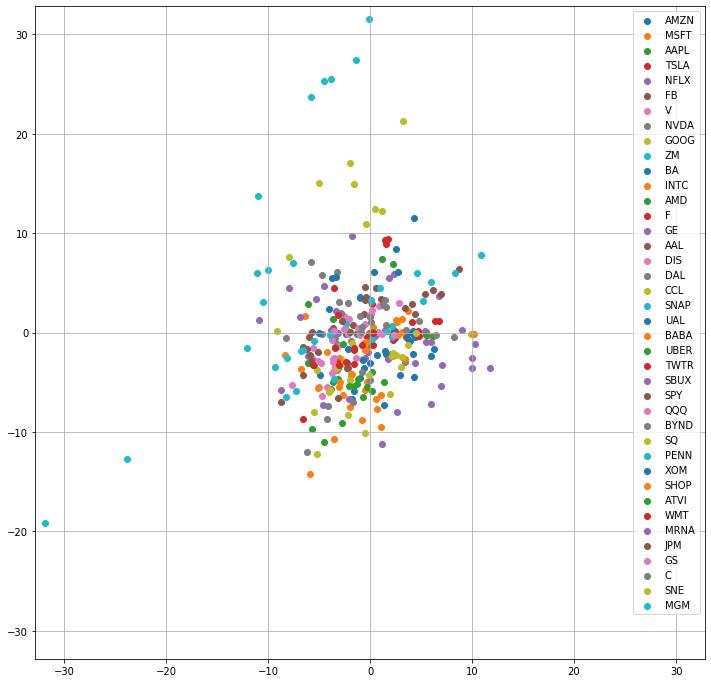

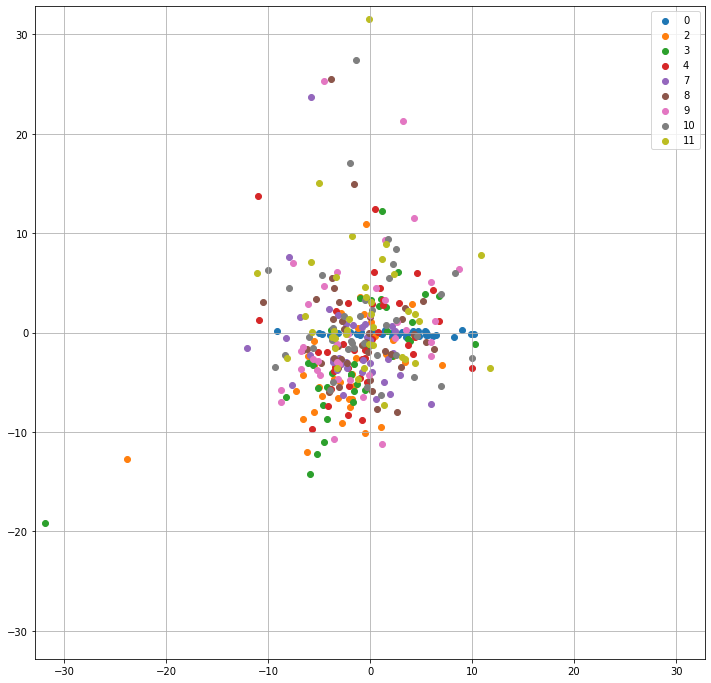

In [61]:
plt.figure(figsize=(12,12))

for x in Company_Names:
    Option_Analysis_CPSPticker = Option_Analysis_CPSP.loc[lambda Option_Analysis_CPSP: \
                                                    Option_Analysis_CPSP['Tickers']== x, :]
    
    Option_Analysis_CPSPticker_reset = Option_Analysis_CPSPticker.reset_index(drop=True)
    
    Option_Analysis_CPSPticker_reset["Expected %Change Adj"] = Option_Analysis_CPSPticker_reset["Expected %Change"] - \
    DTE0_m
     
    plt.scatter(Option_Analysis_CPSPticker_reset["Expected %Change"],\
                Option_Analysis_CPSPticker_reset["Actual %Change"], label = x)

    plt.gca().set_xlim(minaxis-1,\
                       maxaxis+1)
    plt.gca().set_ylim(minaxis-1,\
                       maxaxis+1)
plt.grid()
plt.legend()
print(DTE0_m)

plt.figure(figsize=(12,12))

for x in Option_Analysis_CPSPticker_reset["Days_to_Exp"]:
    Option_Analysis_CPSP_days = Option_Analysis_CPSP.loc[lambda Option_Analysis_CPSP: \
                                                Option_Analysis_CPSP['Days_to_Exp']== x, :]
    Option_Analysis_CPSP_days_reset = Option_Analysis_CPSP_days.reset_index(drop=True)
    
    DTE0_m = Option_Analysis_CPSP["Expected - Actual"].mean()
    
    #Option_Analysis_CPSP_days_reset["Expected %Change Adj"] = Option_Analysis_CPSP_days_reset["Expected %Change"] - \
    #DTE0_m
    
    plt.scatter(Option_Analysis_CPSP_days_reset["Expected %Change"],\
                Option_Analysis_CPSP_days_reset["Actual %Change"], label = x)

    plt.gca().set_xlim(minaxis-1,\
                       maxaxis+1)
    plt.gca().set_ylim(minaxis-1,\
                       maxaxis+1)
plt.grid()
plt.legend()

In [62]:
ePredictions = []
aPredictions = []

for x in Option_Analysis_CPSP["Expected %Change"]:
    if x > 0:
        ePredictions.append("positive")
    else: 
        ePredictions.append("negative")
        
for x in Option_Analysis_CPSP["Actual %Change"]:
    if x > 0:
        aPredictions.append("positive")
    else: 
        aPredictions.append("negative")
        
Prediction = []        
for x,y in zip(ePredictions, aPredictions):
    if x == y:
        Prediction.append("Correct")
    else: 
        Prediction.append("False")

da = Prediction.count("Correct")/np.shape(Option_Analysis_CPSP)[0]*100

shape = np.shape(Option_Analysis_CPSP)[0]

print(Prediction.count("Correct"), "correctly predicted out of",shape," hence a ",da,"% Accuracy" )
print(Prediction.count("False"), "incorrectly predicted out of", shape)
Option_Analysis_CPSP["predicted Direction"] = Prediction

pd.set_option("display.max_rows", None, "display.max_columns", None) 
Option_Analysis_CPSP[["Tickers","Days_to_Exp","Price @ DtE","CPSP", "Actual Price @ Expiry",\
                             "Expected %Change","Actual %Change","predicted Direction" ]]

208 correctly predicted out of 342  hence a  60.81871345029239 % Accuracy
134 incorrectly predicted out of 342


/Users/xpatricklorenzx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Tickers,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,predicted Direction
0,AAL,0,13.608100,13.903275,13.610000,2.169109,0.013960,Correct
1,AAL,2,13.230000,13.774923,13.610000,4.118845,2.872261,Correct
2,AAL,3,13.100000,13.806452,13.610000,5.392759,3.893124,Correct
3,AAL,4,13.050000,13.861768,13.610000,6.220445,4.291184,Correct
4,AAL,7,13.590000,13.927103,13.610000,2.480525,0.147163,Correct
5,AAL,8,13.280000,13.732595,13.610000,3.408094,2.484939,Correct
6,AAL,9,12.785000,13.904844,13.610000,8.759045,6.452873,Correct
7,AAL,10,13.103300,14.015635,13.610000,6.962635,3.866961,Correct
8,AAL,11,13.355000,13.940874,13.610000,4.386928,1.909398,Correct
9,AMD,0,82.290001,87.342385,82.010002,6.139730,-0.340259,False


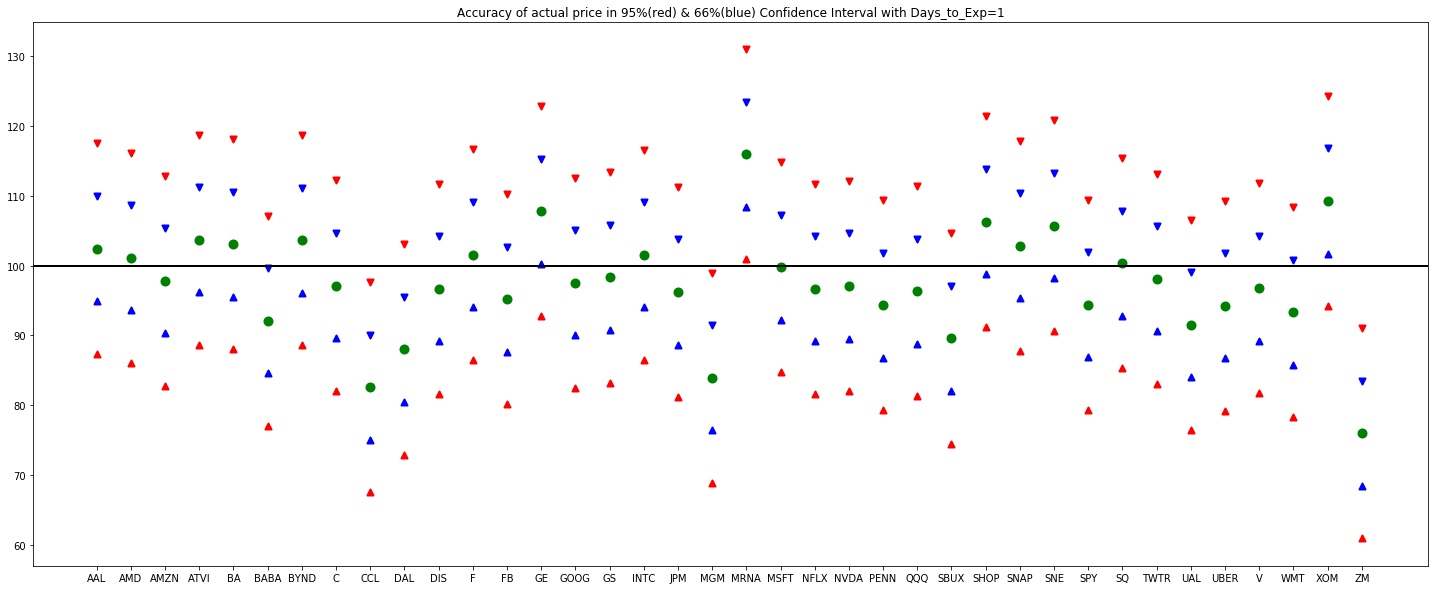

In [37]:
#CONFIDENCE INTERVALS
Option_Analysis_CPSP_graph = Option_Analysis_CPSP4_reset
Analysis_std = Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"].std()

Option_Analysis_CPSP_graph["1sig_left_%pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]-\
                                                  Analysis_std)
Option_Analysis_CPSP_graph["1sig_right_%pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]+\
                                                   Analysis_std)

Option_Analysis_CPSP_graph["2sig_left_%pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]-\
                                                  (2*Analysis_std))
Option_Analysis_CPSP_graph["2sig_right_%pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]+\
                                                   (2*Analysis_std))

Option_Analysis_CPSP_graph["95%CI_left_tail_$_pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]-\
2*Analysis_std)/100*Option_Analysis_CPSP_graph["Actual Price @ Expiry"]
Option_Analysis_CPSP_graph["95%CI_right_tail_$_pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]+\
2*Analysis_std)/100*Option_Analysis_CPSP_graph["Actual Price @ Expiry"]

Option_Analysis_CPSP_graph["66%CI_left_tail_$_pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]-\
Analysis_std)/100*Option_Analysis_CPSP_graph["Actual Price @ Expiry"]
Option_Analysis_CPSP_graph["66%CI_right_tail_$_pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]+\
Analysis_std)/100*Option_Analysis_CPSP_graph["Actual Price @ Expiry"]

Option_Analysis_CPSP_graph[["Tickers","CPSP","Actual Price @ Expiry","Expected - Actual",\
                      "95%CI_left_tail_$_pred","95%CI_right_tail_$_pred",\
                      "66%CI_left_tail_$_pred","66%CI_right_tail_$_pred"]]

plt.figure(figsize=(25,10))
for x in Option_Analysis_CPSP_graph["Tickers"]:
    
    graphing = Option_Analysis_CPSP_graph.loc[lambda Option_Analysis_CPSP_graph: \
                                           Option_Analysis_CPSP_graph['Tickers']== x, :]
    
    plt.scatter(graphing["Tickers"],graphing["Prediction_Accuracy_%_CPSP"],c="green",linewidths=4)
    plt.scatter(graphing["Tickers"],graphing["2sig_left_%pred"], c="r", marker="^",linewidths=2)
    plt.scatter(graphing["Tickers"],graphing["2sig_right_%pred"], c="r", marker="v",linewidths=2)
    plt.scatter(graphing["Tickers"],graphing["1sig_left_%pred"], c="b", marker="^",linewidths=2)
    plt.scatter(graphing["Tickers"],graphing["1sig_right_%pred"], c="b", marker="v",linewidths=2)
    plt.axhline(y=100, c="k")
    plt.title("Accuracy of actual price in 95%(red) & 66%(blue) Confidence Interval with Days_to_Exp=1")
    plt.show 

In [7]:
Option_Analysis_df = pd.read_csv("Option_Weekly_csv/2020_09_07/Option_Weekly_2020_09_07.csv")

df1 = Option_Analysis_df

In [8]:
Fundamental_Analysis_df = pd.read_csv("Option_Weekly_csv/2020_09_07/Company_Fundamentals_2020_09_07.csv")
df2 = Fundamental_Analysis_df

In [9]:
df_outer = pd.merge(df1, df2, on='Tickers', how='outer')
df_outer_adj = df_outer.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)

In [11]:
df_outer_adj = df_outer.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)

In [12]:
df_outer_adj

,Tickers,Todays Price,Option Exp Date,Days_to_Exp,Calls_WOI,Puts_WOI,CPSP,implied Change to prior week,implied %Change to prior week,MarketCap,Beta,50 Day MA,MA to TP %,1W %Change,30day Vol,Avg Daily %Return,95% VaR,1W Ticker vs Bm %Change
0,AMZN,3294.620117,2020-09-11,4,3654.897677,3225.044151,3482.956266,188.336149,5.716475,1650.242224128,1.323857,3144.887603,-4.544758,-3.099408,2.347447,0.3285,-4.33,-1.169893
1,AMZN,3294.620117,2020-09-18,11,3317.639030,2595.051111,3028.603862,-454.352404,-13.045022,1650.242224128,1.323857,3144.887603,-4.544758,-3.099408,2.347447,0.3285,-4.33,-1.169893
2,AMZN,3294.620117,2020-09-25,18,3794.618938,3148.426966,3536.142149,507.538287,16.758160,1650.242224128,1.323857,3144.887603,-4.544758,-3.099408,2.347447,0.3285,-4.33,-1.169893
3,AMZN,3294.620117,2020-10-02,25,3451.482174,3130.258757,3322.992807,-213.149342,-6.027737,1650.242224128,1.323857,3144.887603,-4.544758,-3.099408,2.347447,0.3285,-4.33,-1.169893
4,MSFT,214.250000,2020-09-11,4,234.784159,209.183874,224.544045,10.294045,4.804689,1621.369028608,0.893534,210.918800,-1.554819,-5.441787,2.062656,0.2266,-5.48,-3.512272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,SNE,77.660004,2020-10-02,25,83.129376,78.107362,81.120570,0.283763,0.351032,95.414632448,1.118674,77.378600,-0.362353,-3.431975,1.626756,0.1349,-4.19,-1.502460
156,MGM,23.520000,2020-09-11,4,23.446343,20.365959,22.214190,-1.305811,-5.551916,11.601969152,2.397993,18.767000,-20.208335,3.112674,3.918452,0.0630,-12.60,5.042190
157,MGM,23.520000,2020-09-18,11,23.231340,14.187516,19.613810,-2.600379,-11.705938,11.601969152,2.397993,18.767000,-20.208335,3.112674,3.918452,0.0630,-12.60,5.042190
158,MGM,23.520000,2020-09-25,18,24.904639,20.421747,23.111482,3.497672,17.832700,11.601969152,2.397993,18.767000,-20.208335,3.112674,3.918452,0.0630,-12.60,5.042190
